In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [129]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [130]:
df = pd.read_csv('LoanStats_securev1_2019Q1.csv', header=1)
df.drop(df.tail(2).index,inplace=True)

/Users/kennymiyasato/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,129,130,131,134,135,136,139,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [131]:
# df.head()

In [132]:
# df.columns

In [133]:
# cols = df.columns.tolist()

In [134]:
# final pick
df1 = df[['id','annual_inc','loan_amnt','purpose','application_type','grade','emp_length','tot_hi_cred_lim','home_ownership','addr_state','fico_range_low','dti']]

# clean id to numeric
df1['id'] = pd.to_numeric(df1['id'])

# clean emp_length
df1 = df1.replace(to_replace=["< 1 year", "10+ years"], value=["0", "10"])
df1['emp_length'] = df1['emp_length'].str.replace('years','')
df1['emp_length'] = df1['emp_length'].str.replace('year','')
df1['emp_length'] = pd.to_numeric(df1['emp_length'])

# add more than 50k annual income column
def annual_inc_calculate(row):
    if row['annual_inc'] <= 50000:
        val = 0
    else:
        val = 1
    return val
df1['more_than_50k'] = df.apply(annual_inc_calculate, axis=1)

# limit dti
high_dti = df1[df1['dti'] > 100].index
df1.drop(high_dti, inplace=True)

# limit tot_hi_cred_lim
high_tot_hi_cred_lim = df1[df1['tot_hi_cred_lim'] > 1000000].index
df1.drop(high_tot_hi_cred_lim, inplace=True)

#show df
df1 = df1[['id','annual_inc','more_than_50k','loan_amnt','emp_length','tot_hi_cred_lim','fico_range_low','dti','purpose','application_type','grade','home_ownership','addr_state']]
df1

/Users/kennymiyasato/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,id,annual_inc,more_than_50k,loan_amnt,emp_length,tot_hi_cred_lim,fico_range_low,dti,purpose,application_type,grade,home_ownership,addr_state
0,149328059,68000.0,1,13500.0,8.0,224894.0,750.0,15.74,debt_consolidation,Individual,A,MORTGAGE,PA
1,149420408,110000.0,1,20000.0,10.0,256497.0,675.0,23.44,major_purchase,Individual,D,RENT,NY
2,149453166,27840.0,0,1600.0,1.0,46994.0,685.0,15.99,other,Individual,B,RENT,TX
3,149491641,28000.0,0,6400.0,0.0,22700.0,700.0,8.62,debt_consolidation,Individual,C,RENT,NY
4,149513578,130000.0,1,25000.0,0.0,348856.0,695.0,23.27,small_business,Joint App,A,MORTGAGE,LA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115670,144957684,48000.0,0,5000.0,NaN,88613.0,735.0,8.28,home_improvement,Individual,C,MORTGAGE,FL
115671,143835299,96000.0,1,6000.0,0.0,33500.0,740.0,0.31,debt_consolidation,Individual,A,MORTGAGE,CT
115672,145177297,32000.0,0,16000.0,10.0,34200.0,685.0,20.89,debt_consolidation,Individual,C,MORTGAGE,CA
115673,145190854,72000.0,1,16000.0,5.0,251486.0,660.0,7.02,debt_consolidation,Individual,B,MORTGAGE,AZ


In [135]:
y = df1[['more_than_50k']]
X = df1.drop(['id', 'annual_inc', 'more_than_50k', 'purpose',
     'application_type', 'grade', 'home_ownership', 'addr_state'], axis=1)

scale = MinMaxScaler()
transformed = scale.fit_transform(X)
X = pd.DataFrame(transformed, columns = X.columns)

In [136]:
# df1['loan_amnt'].equals(df1['funded_amnt'])

In [137]:
# df1.isna().sum()

In [138]:
df1 = df1.dropna()

In [139]:
# df1.isna().sum()

In [140]:
df1

,id,annual_inc,more_than_50k,loan_amnt,emp_length,tot_hi_cred_lim,fico_range_low,dti,purpose,application_type,grade,home_ownership,addr_state
0,149328059,68000.0,1,13500.0,8.0,224894.0,750.0,15.74,debt_consolidation,Individual,A,MORTGAGE,PA
1,149420408,110000.0,1,20000.0,10.0,256497.0,675.0,23.44,major_purchase,Individual,D,RENT,NY
2,149453166,27840.0,0,1600.0,1.0,46994.0,685.0,15.99,other,Individual,B,RENT,TX
3,149491641,28000.0,0,6400.0,0.0,22700.0,700.0,8.62,debt_consolidation,Individual,C,RENT,NY
4,149513578,130000.0,1,25000.0,0.0,348856.0,695.0,23.27,small_business,Joint App,A,MORTGAGE,LA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115668,145272394,52500.0,1,15000.0,10.0,193466.0,695.0,21.74,debt_consolidation,Individual,C,MORTGAGE,PA
115671,143835299,96000.0,1,6000.0,0.0,33500.0,740.0,0.31,debt_consolidation,Individual,A,MORTGAGE,CT
115672,145177297,32000.0,0,16000.0,10.0,34200.0,685.0,20.89,debt_consolidation,Individual,C,MORTGAGE,CA
115673,145190854,72000.0,1,16000.0,5.0,251486.0,660.0,7.02,debt_consolidation,Individual,B,MORTGAGE,AZ


In [141]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103723 entries, 0 to 115674
Data columns (total 13 columns):
id                  103723 non-null int64
annual_inc          103723 non-null float64
more_than_50k       103723 non-null int64
loan_amnt           103723 non-null float64
emp_length          103723 non-null float64
tot_hi_cred_lim     103723 non-null float64
fico_range_low      103723 non-null float64
dti                 103723 non-null float64
purpose             103723 non-null object
application_type    103723 non-null object
grade               103723 non-null object
home_ownership      103723 non-null object
addr_state          103723 non-null object
dtypes: float64(6), int64(2), object(5)
memory usage: 11.1+ MB


In [142]:
df1.isna().any()

id                  False
annual_inc          False
more_than_50k       False
loan_amnt           False
emp_length          False
tot_hi_cred_lim     False
fico_range_low      False
dti                 False
purpose             False
application_type    False
grade               False
home_ownership      False
addr_state          False
dtype: bool

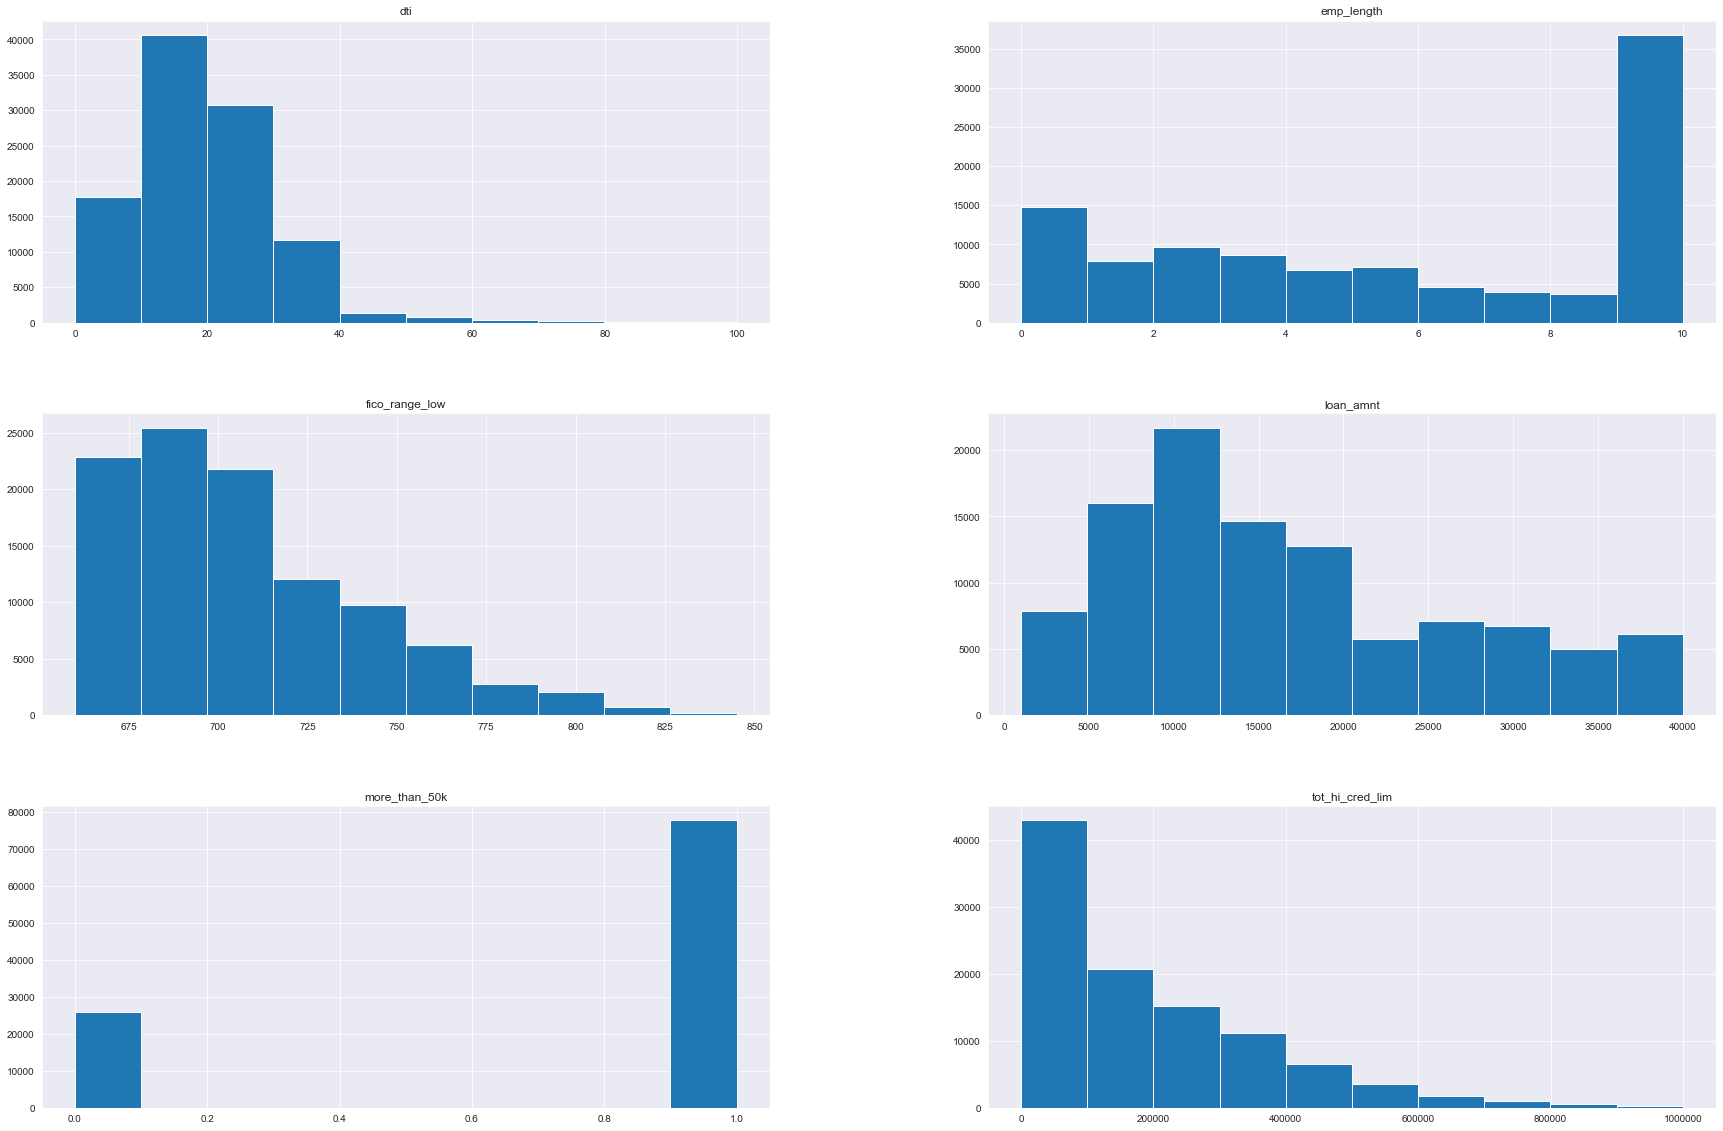

In [143]:
feat = df1.loc[:, 'more_than_50k':'dti']
feat.hist(figsize=(30,20));

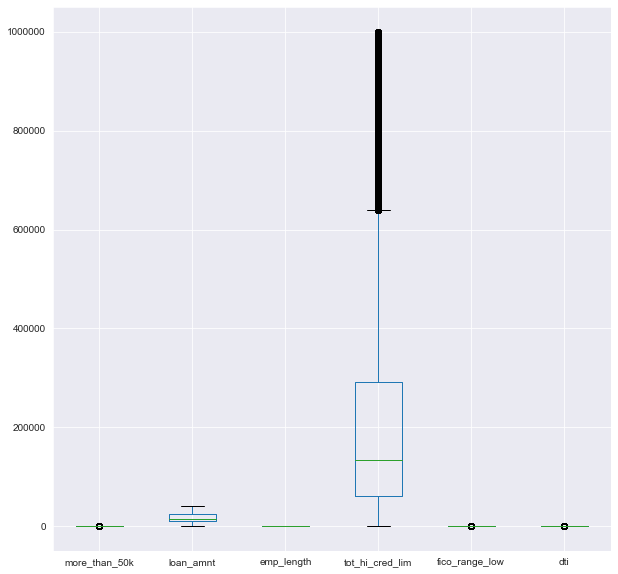

In [144]:
feat.boxplot(figsize=(10,10));

In [145]:
cred_lim = 1000000
df1[df1['tot_hi_cred_lim'] >= cred_lim].sort_values('tot_hi_cred_lim', ascending=False)

,id,annual_inc,more_than_50k,loan_amnt,emp_length,tot_hi_cred_lim,fico_range_low,dti,purpose,application_type,grade,home_ownership,addr_state


In [146]:
(df1[df1['tot_hi_cred_lim'] >= cred_lim].sort_values('tot_hi_cred_lim', ascending=False)).count()

id                  0
annual_inc          0
more_than_50k       0
loan_amnt           0
emp_length          0
tot_hi_cred_lim     0
fico_range_low      0
dti                 0
purpose             0
application_type    0
grade               0
home_ownership      0
addr_state          0
dtype: int64

In [147]:
feat.isna().any().any()

False

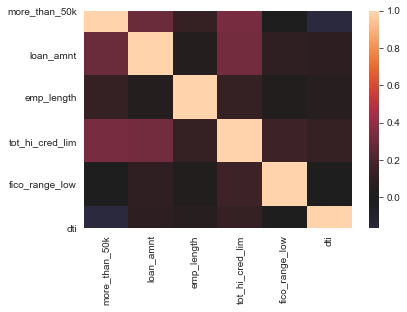

In [148]:
feat = df1.loc[:, 'more_than_50k':'dti']

sns.heatmap(feat.corr(), center=0)

In [149]:
# One-Hot Encoding Categorical Columns
# feats = ['addr_state', 'home_ownership', 'grade']
# df1 = df1[feats]
df1 = pd.get_dummies(df1, drop_first=True)

In [150]:
df1

,id,annual_inc,more_than_50k,loan_amnt,emp_length,tot_hi_cred_lim,fico_range_low,dti,purpose_credit_card,purpose_debt_consolidation,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,149328059,68000.0,1,13500.0,8.0,224894.0,750.0,15.74,0,1,...,0,0,0,0,0,0,0,0,0,0
1,149420408,110000.0,1,20000.0,10.0,256497.0,675.0,23.44,0,0,...,0,0,0,0,0,0,0,0,0,0
2,149453166,27840.0,0,1600.0,1.0,46994.0,685.0,15.99,0,0,...,0,0,1,0,0,0,0,0,0,0
3,149491641,28000.0,0,6400.0,0.0,22700.0,700.0,8.62,0,1,...,0,0,0,0,0,0,0,0,0,0
4,149513578,130000.0,1,25000.0,0.0,348856.0,695.0,23.27,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115668,145272394,52500.0,1,15000.0,10.0,193466.0,695.0,21.74,0,1,...,0,0,0,0,0,0,0,0,0,0
115671,143835299,96000.0,1,6000.0,0.0,33500.0,740.0,0.31,0,1,...,0,0,0,0,0,0,0,0,0,0
115672,145177297,32000.0,0,16000.0,10.0,34200.0,685.0,20.89,0,1,...,0,0,0,0,0,0,0,0,0,0
115673,145190854,72000.0,1,16000.0,5.0,251486.0,660.0,7.02,0,1,...,0,0,0,0,0,0,0,0,0,0


In [151]:
df1.describe()

,id,annual_inc,more_than_50k,loan_amnt,emp_length,tot_hi_cred_lim,fico_range_low,dti,purpose_credit_card,purpose_debt_consolidation,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
count,1.037230e+05,1.037230e+05,103723.000000,103723.000000,103723.000000,103723.000000,103723.000000,103723.000000,103723.000000,103723.000000,...,103723.000000,103723.000000,103723.000000,103723.000000,103723.000000,103723.000000,103723.000000,103723.000000,103723.000000,103723.000000
mean,1.473759e+08,8.740465e+04,0.750412,16950.522064,5.444096,196788.197391,706.693742,19.595651,0.278087,0.550919,...,0.001996,0.017219,0.083723,0.006864,0.027043,0.002372,0.021249,0.013343,0.005438,0.002005
std,1.238251e+06,1.089144e+05,0.432777,10344.743289,3.869869,175691.067960,34.575800,10.679689,0.448059,0.497403,...,0.044629,0.130087,0.276973,0.082567,0.162210,0.048643,0.144214,0.114740,0.073539,0.044736
min,8.597283e+06,0.000000e+00,0.000000,1000.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.463912e+08,5.023100e+04,1.000000,9800.000000,2.000000,60838.000000,680.000000,12.220000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.473979e+08,7.200000e+04,1.000000,15000.000000,5.000000,133808.000000,700.000000,18.350000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.483216e+08,1.030000e+05,1.000000,24000.000000,10.000000,292240.000000,725.000000,25.480000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.495229e+08,9.000000e+06,1.000000,40000.000000,10.000000,999757.000000,845.000000,99.870000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Target Variable
more_than_50k
0    25888
1    77835
Name: more_than_50k, dtype: int64


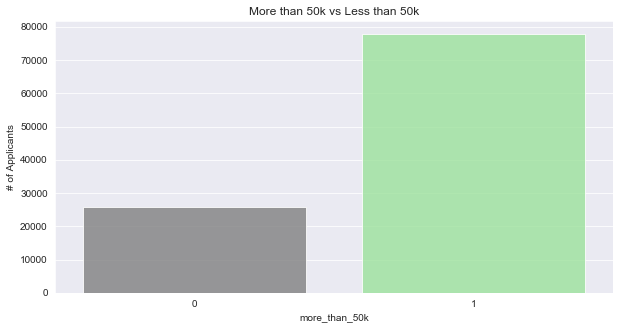

In [152]:
# More than 50k Count
print('Target Variable')
print(df1.groupby(['more_than_50k']).more_than_50k.count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df1['more_than_50k'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('More than 50k vs Less than 50k')
plt.ylabel('# of Applicants')
plt.show()

In [153]:
# beat 33% from looking at the base accuracy rate

In [154]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scratch Work

In [344]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# df.drop(df.columns[0], axis=1)
# new_header = df.iloc[0] #grab the first row for the header
# df = df[1:] #take the data less the header row
# df.columns = new_header #set the header row as the df header

# df1['addr_state'].unique()
# df1['home_ownership'].unique()
# df1['grade'].unique()
# df1['application_type'].unique()
# df1['purpose'].unique()
 
# df1 = df[['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment','grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d']]
# df1 = df[['loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state','dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record']]
# df1 = df[['open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d']]
# df1 = df[['last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code']]
# df1 = df[['application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m']]
# df1 = df[['open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m']]
# df1 = df[['max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal']]
# df1 = df[['bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl']]
# df1 = df[['mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl']]
# df1 = df[['num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m']]
# df1 = df[['num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim']]
# df1 = df[['total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths']]
# df1 = df[['sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog']]
# df1 = df[['hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date']]
# df1 = df[['payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag']]
# df1  = df[['debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term']]
# df1.head(20)
# df1[df1['dti'] > 80].sort_values('dti', ascending=True)

In [345]:
# df1.isna().sum()

In [346]:
# df1 = df1.dropna()

In [347]:
# len(df1['emp_title'].unique())

In [348]:
# df1['application_type'].unique()

In [204]:
X = df1#.drop('income', 1)
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'purpose' has 12 unique categories
Feature 'application_type' has 2 unique categories
Feature 'grade' has 7 unique categories
Feature 'home_ownership' has 5 unique categories
Feature 'addr_state' has 50 unique categories


In [243]:
# print(X['addr_state'].value_counts().sort_values(ascending=False).head(55))

In [231]:
# df2 = df1.groupby('application_type')
# df2 = df1.sort_values(by=['application_type'])
# df2.tail(50)

# Notes

In [59]:
# .*\n.*\n

# id = A unique LC assigned ID for the loan listing.
# member_id = no use / A unique LC assigned Id for the borrower member.
# loan_amnt = The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
# funded_amnt = The total amount committed to that loan at that point in time.
# funded_amnt_inv = The total amount committed by investors for that loan at that point in time.
# term = The number of payments on the loan. Values are in months and can be either 36 or 60.
# int_rate = 
# grade = LC assigned loan grade
# sub_grade = LC assigned loan subgrade
# emp_length = Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
# home_ownership = The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
# ****annual_inc = The self-reported annual income provided by the borrower during registration.
# addr_state = The state provided by the borrower in the loan application
# dti = A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
# fico_range_low = The lower boundary range the borrower’s FICO at loan origination belongs to.
# fico_range_high = The upper boundary range the borrower’s FICO at loan origination belongs to.


# useful columns
# id
# loan_amnt
# funded_amnt
# grade
# sub_grade
# emp_length
# home_ownership
# ****annual_inc
# addr_state 
# fico_range_low
# dti



# no dti > 100
# 115274
# 104294
# 10,980‬

# 115677
# 104544
# 11,133‬